# Contents
### 01. Importing libraries and data
### 02. Filtering and preprocessing data
### 03. The elbow technique
### 04. k-means clustering

# 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import folium
import json

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# import .json file
country_geo = r'/Users/kirstinhelgeson/Desktop/Data Analytics Course/A6/us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:
f = open(r'/Users/kirstinhelgeson/Desktop/Data Analytics Course/A6/us-states.json',)

# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# create path to import data
path = r'/Users/kirstinhelgeson/Desktop/Data Analytics Course/07-2023 Achievement 6 Project'

In [6]:
# import COVID deaths data
df_covid_deaths = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','COVID_deaths_wrangled_cleaned.csv'), index_col = False)

In [7]:
# check shape of covid deaths dataframe
df_covid_deaths.shape

(26832, 11)

In [8]:
# check output of covid deaths dataframe
df_covid_deaths.head()

,Year,Month,State,Age Group,Footnote,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,2020,1,Alabama,All Ages,One or more data cells have counts between 1-9...,4,4729,282,0,35,318
1,2020,1,Alabama,Under 1 year,NaN,0,31,0,0,0,0
2,2020,1,Alabama,1-4 years,One or more data cells have counts between 1-9...,0,12,4,0,0,4
3,2020,1,Alabama,5-14 years,One or more data cells have counts between 1-9...,0,16,4,0,0,4
4,2020,1,Alabama,15-24 years,One or more data cells have counts between 1-9...,0,56,0,0,4,4


# 02. Filtering and preprocessing data

In [9]:
# filter for only "All Ages" from "Age Group" column in covid deaths dataframe
df_covid_deaths_filtered = df_covid_deaths[df_covid_deaths['Age Group'] != 'All Ages']

In [10]:
# filter out all categorical columns: 'State', 'Age Group', 'Footnote'
columns_to_remove = ['State','Age Group','Footnote'] # create subset of columns to be removed
df_covid_deaths_filtered_2 = df_covid_deaths_filtered.drop(columns = columns_to_remove) # drop subset of columns we want removed

In [11]:
# check output of filtered data
df_covid_deaths_filtered_2.head()

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
1,2020,1,0,31,0,0,0,0
2,2020,1,0,12,4,0,0,4
3,2020,1,0,16,4,0,0,4
4,2020,1,0,56,0,0,4,4
5,2020,1,0,77,4,0,0,4


# 03. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_covid_deaths_filtered_2).score(df_covid_deaths_filtered_2) for i in range(len(kmeans))]

score

[-24489731047.844246,
 -9543692225.292763,
 -4703068143.573321,
 -3282945629.576304,
 -2433511756.621837,
 -1970310261.1473167,
 -1575692249.1987123,
 -1349571874.6369734,
 -1181986521.424469]

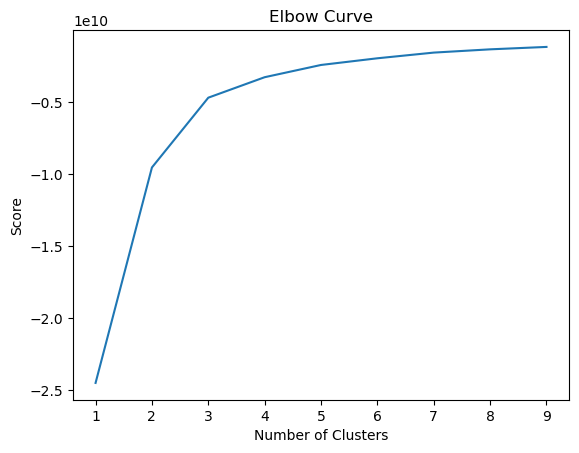

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### There is a jump from 2 to 3 on the x-axis, but after that the curve levels out. This means the optimal count for number of clusters is three.

# 04. k-means clustering

In [15]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_init=10)

In [16]:
# fit the k-means object to the data.
kmeans.fit(df_covid_deaths_filtered_2)

KMeans(n_clusters=3, n_init=10)

In [17]:
df_covid_deaths_filtered_2['clusters'] = kmeans.fit_predict(df_covid_deaths_filtered_2)

In [18]:
df_covid_deaths_filtered_2.head()

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",clusters
1,2020,1,0,31,0,0,0,0,0
2,2020,1,0,12,4,0,0,4,0
3,2020,1,0,16,4,0,0,4,0
4,2020,1,0,56,0,0,4,4,0
5,2020,1,0,77,4,0,0,4,0


In [19]:
df_covid_deaths_filtered_2['clusters'].value_counts()

0    20419
2     3599
1      578
Name: clusters, dtype: int64

In [20]:
output_file_path = os.path.join(path, '02 Data', 'Prepared Data', 'k-means_scatterplot.csv')
df_covid_deaths_filtered_2.to_csv(output_file_path, index=False)

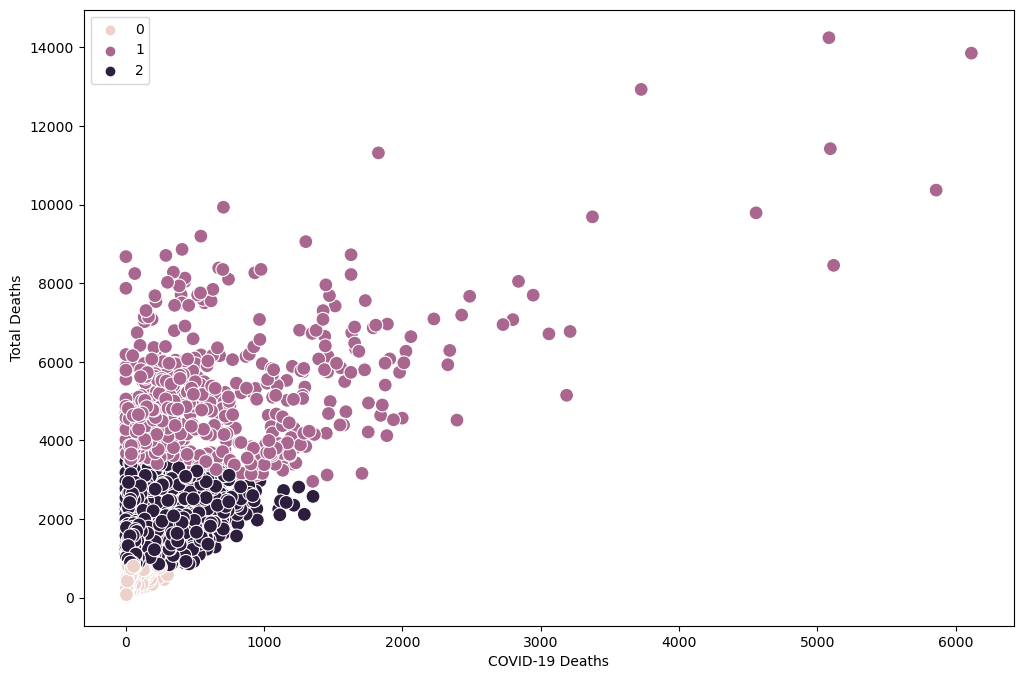

In [22]:
# plot the clusters for the "COVID-19 Deaths" and "Total Deaths" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_covid_deaths_filtered_2['COVID-19 Deaths'], y=df_covid_deaths_filtered_2['Total Deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('COVID-19 Deaths') # Label x-axis.
plt.ylabel('Total Deaths') # Label y-axis.
plt.show()

### These clusters seem to be demarcated by Total Death count. This makes sense. The global COVID-19 pandemic greatly affected US death counts, causing increased Total Deaths from 2020 - 2023.

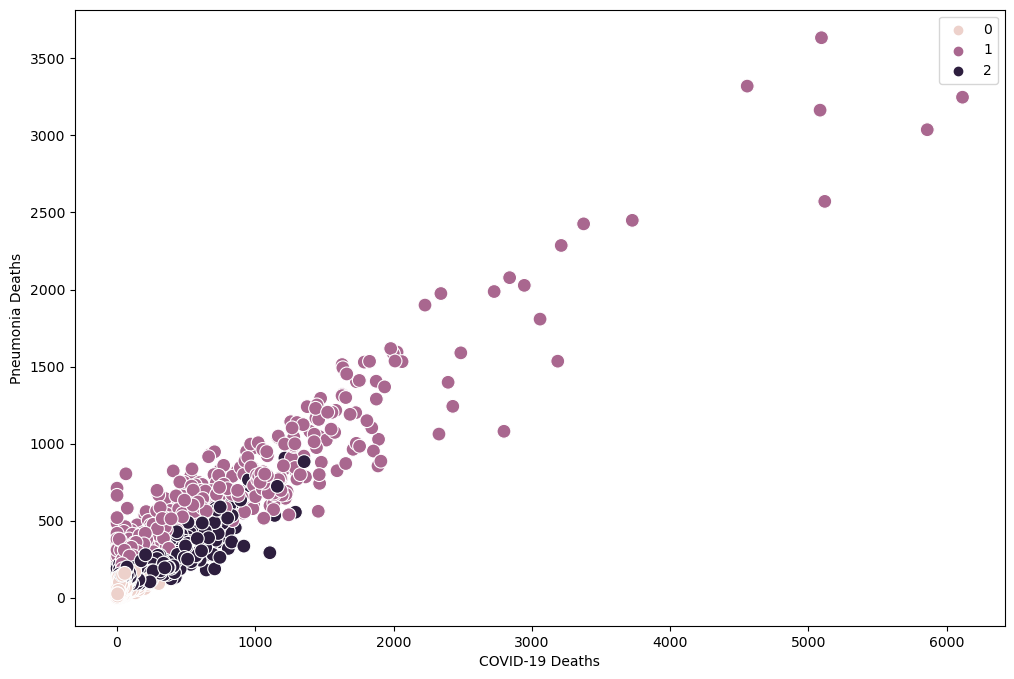

In [23]:
# plot the clusters for the "COVID-19 Deaths" and "Pneumonia Deaths" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_covid_deaths_filtered_2['COVID-19 Deaths'], y=df_covid_deaths_filtered_2['Pneumonia Deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('COVID-19 Deaths') # Label x-axis.
plt.ylabel('Pneumonia Deaths') # Label y-axis.
plt.show()

### These clusters are not as clearly demarcated and seem to overlap a bit. Further investigation may be necessary.

In [24]:
df_covid_deaths_filtered_2.loc[df_covid_deaths_filtered_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_covid_deaths_filtered_2.loc[df_covid_deaths_filtered_2['clusters'] == 1, 'cluster'] = 'purple'
df_covid_deaths_filtered_2.loc[df_covid_deaths_filtered_2['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
df_covid_deaths_filtered_2.groupby('cluster').agg({'COVID-19 Deaths':['mean', 'median'], 
                         'Total Deaths':['mean', 'median'], 
                         'Pneumonia Deaths':['mean', 'median'],
                          'Pneumonia and COVID-19 Deaths':['mean', 'median'],
                          'Influenza Deaths':['mean', 'median'],
                          'Pneumonia, Influenza, or COVID-19 Deaths':['mean','median']})

COVID-19 Deaths        Total Deaths         Pneumonia Deaths  \
                       mean median         mean  median             mean   
cluster                                                                    
dark purple      151.175604   90.0  1568.529592  1408.0       150.329536   
pink              10.797737    4.0   157.153631    62.0        12.246192   
purple           663.264706  393.5  5071.840830  4741.0       622.211073   

                   Pneumonia and COVID-19 Deaths        Influenza Deaths  \
            median                          mean median             mean   
cluster                                                                    
dark purple  119.0                     73.008891   37.0         3.562378   
pink           4.0                      5.413928    0.0         0.617170   
purple       498.0                    347.176471  200.5         9.266436   

                   Pneumonia, Influenza, or COVID-19 Deaths         
            median                                     mean median  
cluster                                                             
dark purple    4.0                               230.959989  174.0  
pink           0.0                                17.969636    4.0  
purple         4.0                               945.025952  698.0

## Cluster Geographic Analysis

In [26]:
# create a new dataframe with 'state' column and clusters
cluster_data = pd.DataFrame({'State': df_covid_deaths_filtered['State'], 'cluster': df_covid_deaths_filtered_2['clusters']})

In [27]:
cluster_data.head(10)

,State,cluster
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0
5,Alabama,0
6,Alabama,0
7,Alabama,0
8,Alabama,0
9,Alabama,2
10,Alabama,2


In [28]:
# reset index
cluster_data_reset = cluster_data.reset_index(drop=True)

In [29]:
cluster_data_reset.head()

,State,cluster
0,Alabama,0
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0


In [30]:
# Setup a folium map at a high-level zoom
map_1 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = cluster_data_reset,
    columns = ['State', 'cluster'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'Greens', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "cluster").add_to(map_1)
folium.LayerControl().add_to(map_1)

map_1

### Clusters do not appear to represent any geographic information based on the State level. Could correspond to city vs. rural populations but we would need more detailed data for this analysis.

## Cluster Age Group Analysis

In [31]:
# create a new dataframe with 'Age Group' column and clusters
cluster_data_2 = pd.DataFrame({'Age Group': df_covid_deaths_filtered['Age Group'], 'cluster': df_covid_deaths_filtered_2['clusters']})

In [32]:
cluster_data_2.head()

,Age Group,cluster
1,Under 1 year,0
2,1-4 years,0
3,5-14 years,0
4,15-24 years,0
5,25-34 years,0


In [33]:
# reset index
cluster_data_reset_2 = cluster_data_2.reset_index(drop=True)

In [34]:
cluster_data_reset_2.head()

,Age Group,cluster
0,Under 1 year,0
1,1-4 years,0
2,5-14 years,0
3,15-24 years,0
4,25-34 years,0


In [35]:
pivot_data = cluster_data_reset_2.pivot_table(index='Age Group', columns='cluster', aggfunc='size', fill_value=0)

<Axes: xlabel='Age Group'>

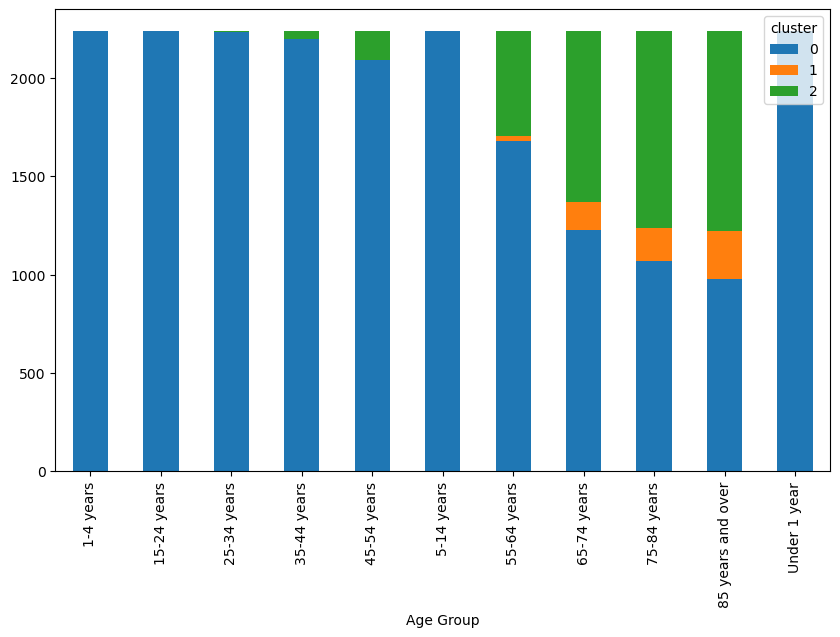

In [36]:
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

In [37]:
output_file_path_2 = os.path.join(path, '02 Data', 'Prepared Data', 'cluster_bar_graph.csv')
cluster_data_reset_2.to_csv(output_file_path_2, index=False)

### The mean and median values of COVID-19 deaths vary significantly across clusters. The "purple" cluster has the highest mean and median COVID-19 deaths, followed by the "dark purple" cluster and the "pink" cluster.
### Similarly, the mean and median values of total deaths also differ significantly among clusters, with the "purple" cluster having the highest mean and median total deaths.
### The mean and median values of pneumonia deaths follow a similar pattern, with the "purple" cluster having the highest values.
### The mean and median values of influenza deaths are relatively lower compared to COVID-19 and pneumonia deaths.
### The mean and median values of deaths involving both pneumonia and COVID-19 are relatively higher in the "purple" cluster.
### The mean and median values of deaths involving pneumonia, influenza, or COVID-19 are significantly higher in the "purple" cluster compared to the other clusters.
### There are notable differences in the central tendency (mean and median) of each variable among the three clusters, suggesting that the data is clustered based on some underlying patterns or characteristics.
### The clusters could represent different geographical regions, age groups, or any other factors that lead to variations in the death statistics. Further analysis and understanding of the data is necessary to draw more meaningful conclusions.